In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
%matplotlib inline

In [2]:
app = pd.read_csv("application_record.csv")

In [3]:
credit = pd.read_csv("credit_record.csv")

## [1] Question 1: Description of the features

In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
app.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
app.drop('OCCUPATION_TYPE', axis = 1,inplace = True)

## [2] Description of the app dataset

In [7]:
app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [8]:
app.skew(axis = 0)

ID                  0.212718
CNT_CHILDREN        1.806941
AMT_INCOME_TOTAL    8.834066
DAYS_BIRTH         -0.160181
DAYS_EMPLOYED       1.739495
FLAG_MOBIL          0.000000
FLAG_WORK_PHONE     1.452898
FLAG_PHONE          0.937568
FLAG_EMAIL          2.522482
CNT_FAM_MEMBERS     0.919676
dtype: float64

In [9]:
len(app['ID'].unique())

438510

In [10]:
len(app['ID'])

438557

In [11]:
app.drop_duplicates('ID', keep = 'last')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,2.0


In [12]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## [3] Info about Credit features

In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [14]:
app.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
CNT_FAM_MEMBERS        float64
dtype: object

In [15]:
app['CODE_GENDER'].value_counts()

F    294440
M    144117
Name: CODE_GENDER, dtype: int64

In [16]:
app['FLAG_OWN_CAR'].value_counts()

N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64

In [17]:
app['FLAG_OWN_REALTY'].value_counts()

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64

In [18]:
app['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [19]:
app['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [20]:
app['NAME_FAMILY_STATUS'].value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [21]:
app['NAME_HOUSING_TYPE'].value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [22]:
app[app['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243])

In [23]:
app['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [24]:
app[app['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([], dtype=int64)

In [25]:
app['DAYS_EMPLOYED'] = round(app['DAYS_EMPLOYED']/-365.0,1)

In [26]:
app.rename(columns = {'DAYS_EMPLOYED': "YEARS_EMPLOYED"}, inplace=True)

In [27]:
app['DAYS_BIRTH'] = round(app['DAYS_BIRTH']/-365.0)

In [28]:
app.rename(columns = {'DAYS_BIRTH': "AGE"}, inplace=True)

In [29]:
app.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
AGE                    float64
YEARS_EMPLOYED         float64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
CNT_FAM_MEMBERS        float64
dtype: object

In [30]:
app['FLAG_MOBIL'].unique()

array([1])

In [31]:
app.drop('FLAG_MOBIL', axis = 1, inplace = True)

In [32]:
app.drop(['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis = 1, inplace = True)

In [33]:
app['CODE_GENDER'].replace('M',0, inplace=True)

In [34]:
app['CODE_GENDER'].replace('F',1, inplace=True)

In [35]:
app['FLAG_OWN_CAR'].replace('Y',1, inplace=True)

In [36]:
app['FLAG_OWN_CAR'].replace('N',0, inplace=True)

In [37]:
app['FLAG_OWN_REALTY'].replace('Y',1, inplace=True)

In [38]:
app['FLAG_OWN_REALTY'].replace('N',0, inplace=True)

In [39]:
app['AMT_INCOME_TOTAL'] = (app['AMT_INCOME_TOTAL'] - app['AMT_INCOME_TOTAL'].min())/(app['AMT_INCOME_TOTAL'].max() - app['AMT_INCOME_TOTAL'].min())

## [4] Boxplots

<AxesSubplot:>

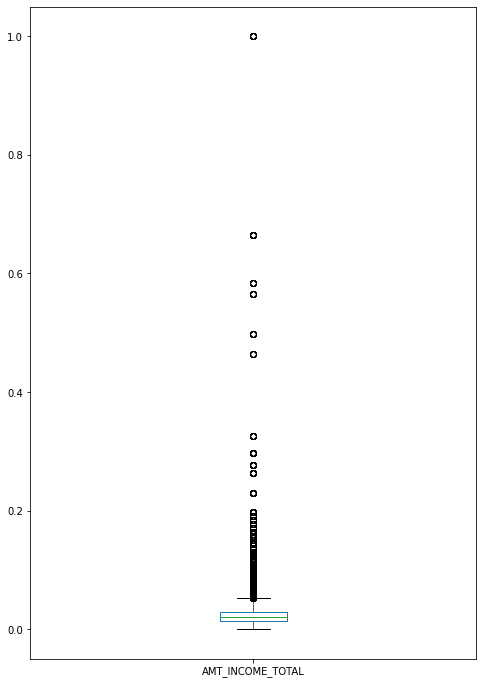

In [40]:
app['AMT_INCOME_TOTAL'].plot(kind = 'box',figsize = (8,12))

<AxesSubplot:>

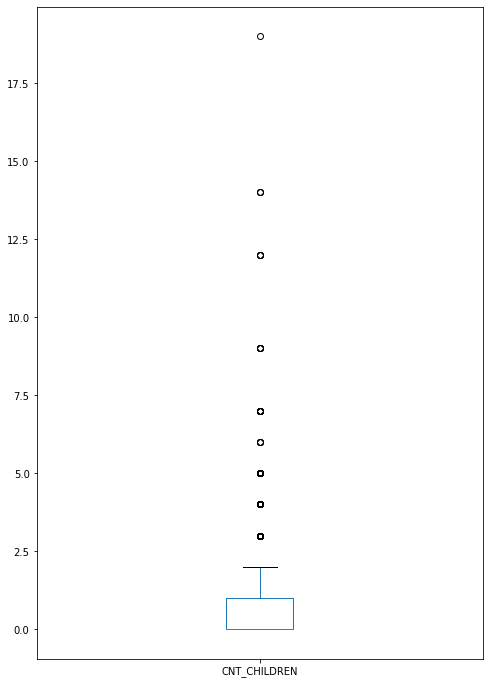

In [41]:
app['CNT_CHILDREN'].plot(kind = 'box',figsize = (8,12))

<AxesSubplot:>

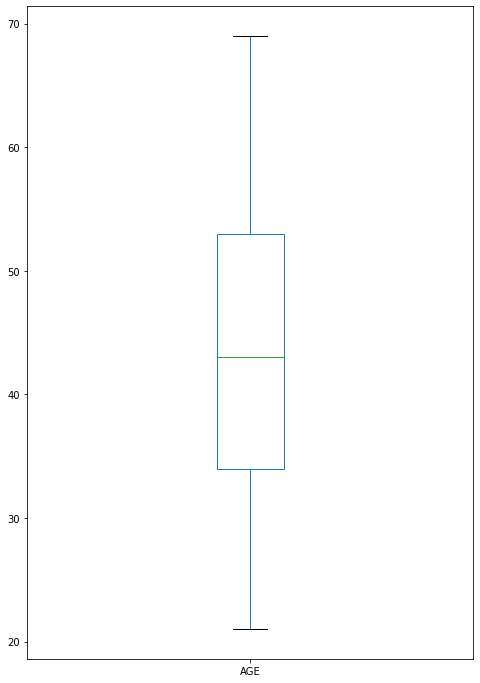

In [42]:
app['AGE'].plot(kind = 'box',figsize = (8,12))

<AxesSubplot:>

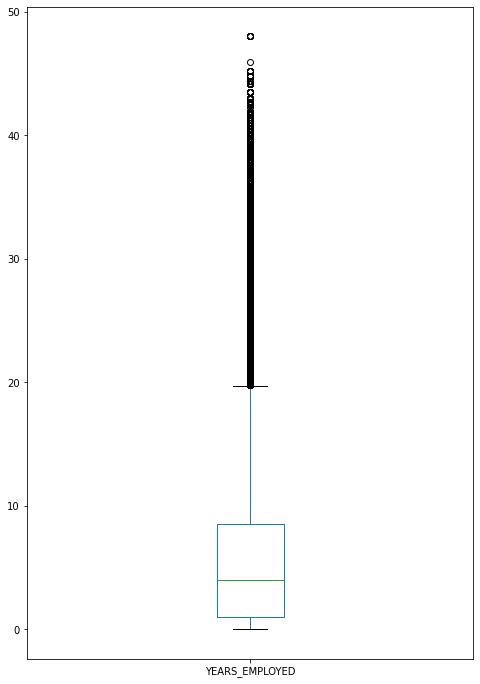

In [43]:
app['YEARS_EMPLOYED'].plot(kind = 'box',figsize = (8,12))

<AxesSubplot:>

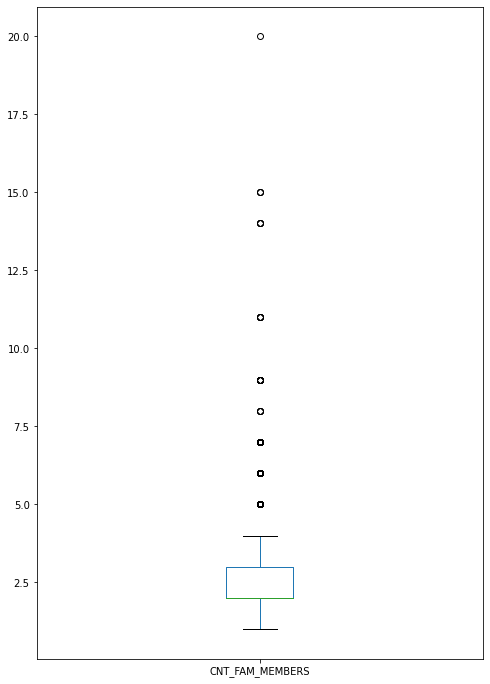

In [44]:
app['CNT_FAM_MEMBERS'].plot(kind = 'box',figsize = (8,12))

## REMOVING OUTLIERS USING IQR METHOD

In [45]:
Q1 = app.quantile(0.25)
Q3 = app.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID                  847596.000000
CODE_GENDER              1.000000
FLAG_OWN_CAR             1.000000
FLAG_OWN_REALTY          1.000000
CNT_CHILDREN             1.000000
AMT_INCOME_TOTAL         0.015393
AGE                     19.000000
YEARS_EMPLOYED           7.500000
CNT_FAM_MEMBERS          1.000000
dtype: float64


In [46]:
app1 = app[~((app < (Q1 - 1.5 * IQR)) |(app > (Q3 + 1.5 * IQR))).any(axis=1)]
app1.shape

<ipython-input-46-8b7e4d4c55fd>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  app1 = app[~((app < (Q1 - 1.5 * IQR)) |(app > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-46-8b7e4d4c55fd>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  app1 = app[~((app < (Q1 - 1.5 * IQR)) |(app > (Q3 + 1.5 * IQR))).any(axis=1)]


(390019, 13)

In [47]:
app1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
2,5008806,0,1,1,0,0.012850,Working,Secondary / secondary special,Married,House / apartment,59.0,3.1,2.0
3,5008808,1,0,1,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.4,1.0
4,5008809,1,0,1,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.4,1.0
5,5008810,1,0,1,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.4,1.0
6,5008811,1,0,1,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.4,1.0


In [48]:
app1.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE                    0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
dtype: int64

In [49]:
credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [50]:
credit['STATUS'].replace(['X','C'],0, inplace=True)

In [51]:
credit['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [52]:
credit['STATUS'].value_counts()

0    1034381
1      14194
Name: STATUS, dtype: int64

In [53]:
credit['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [54]:
credit['ID'].unique().shape

(45985,)

In [55]:
credit1 = credit.groupby('ID').agg(max).reset_index()

In [56]:
credit1.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit1.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [57]:
df = pd.merge(app1, credit1, on = 'ID', how = 'inner')
df.shape

(32710, 14)

In [58]:
df.drop('ID', axis=1, inplace=True)

In [59]:
len(df) - len(df.drop_duplicates())
df = df.drop_duplicates()
df.reset_index(drop=True ,inplace=True)

In [60]:
df.shape

(10004, 13)

<AxesSubplot:>

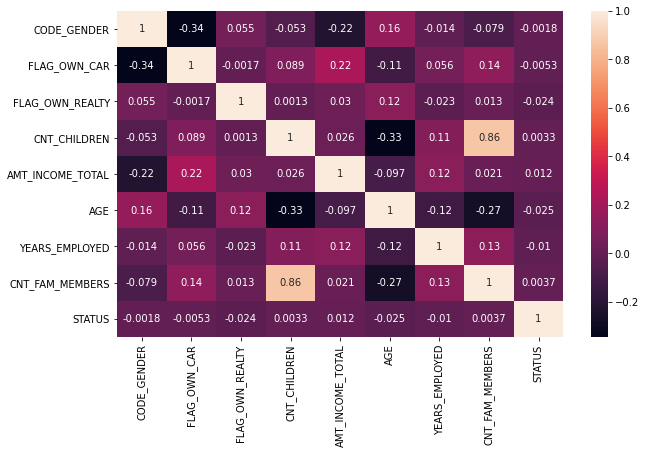

In [61]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


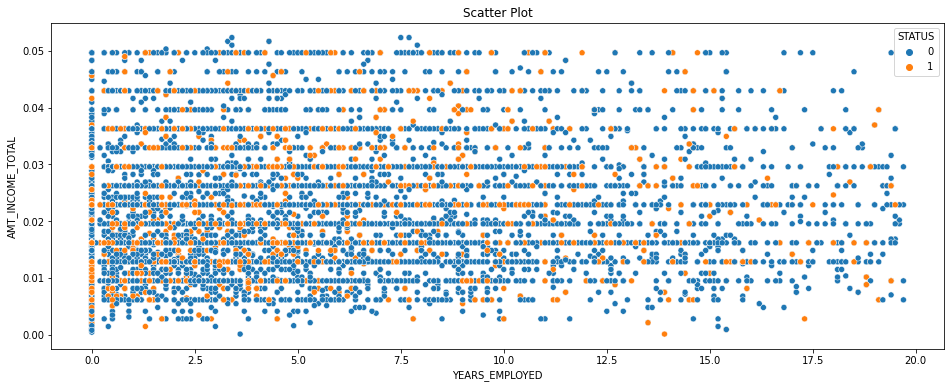

In [62]:
plt.figure(figsize = (16,6))
sns.scatterplot(df['YEARS_EMPLOYED'], df['AMT_INCOME_TOTAL'], hue=df['STATUS'])
plt.title('Scatter Plot')
plt.show()

In [63]:
cat_columns = df.columns[(df.dtypes =='object').values].tolist()
cat_columns

['NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [64]:
only_num = df.drop(['NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE'], axis = 1)

In [65]:
import sklearn

In [66]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        df[col] = globals()['LE_{}'.format(col)].fit_transform(df[col])
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,0,1,1,0,0.012850,4,4,1,1,59.0,3.1,2.0,0
1,1,0,1,0,0.036274,0,4,3,1,52.0,8.4,1.0,0
2,1,0,1,0,0.038281,1,1,2,1,62.0,-0.0,1.0,0
3,0,1,1,0,0.036274,4,1,1,1,46.0,2.1,2.0,0
4,0,1,1,0,0.016196,0,4,1,1,49.0,3.3,2.0,0


In [67]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(drop = 'if_binary')
# cat = pd.DataFrame(ohe.fit_transform(cat_columns).todense(), columns = ohe.get_feature_names_out(cat_columns.columns))

In [68]:
# cat.index = df.index

In [69]:
# df = pd.concat([df,cat], axis = 1)
# df.drop(cat.columns, axis = 1, inplace = True)

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


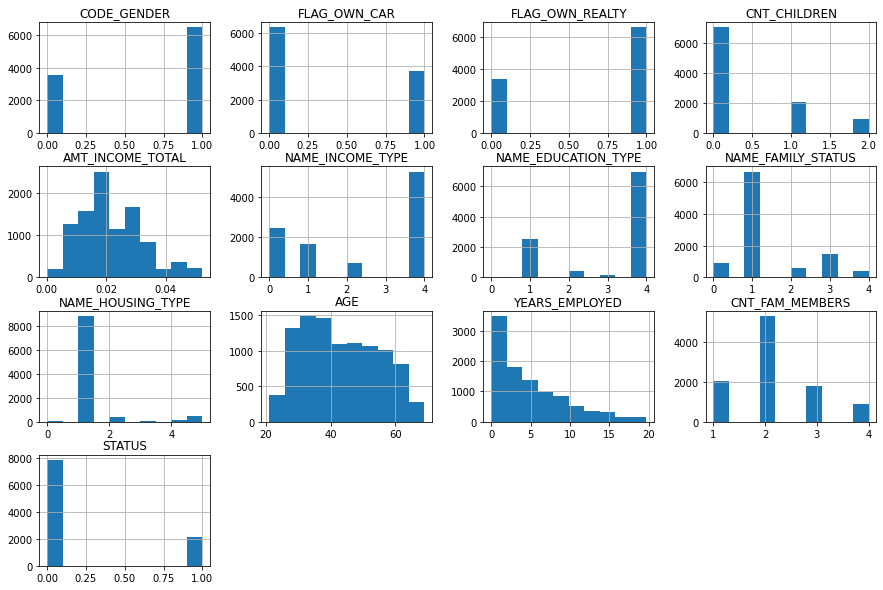

In [70]:
df.hist(figsize = (15,10))
plt.show()

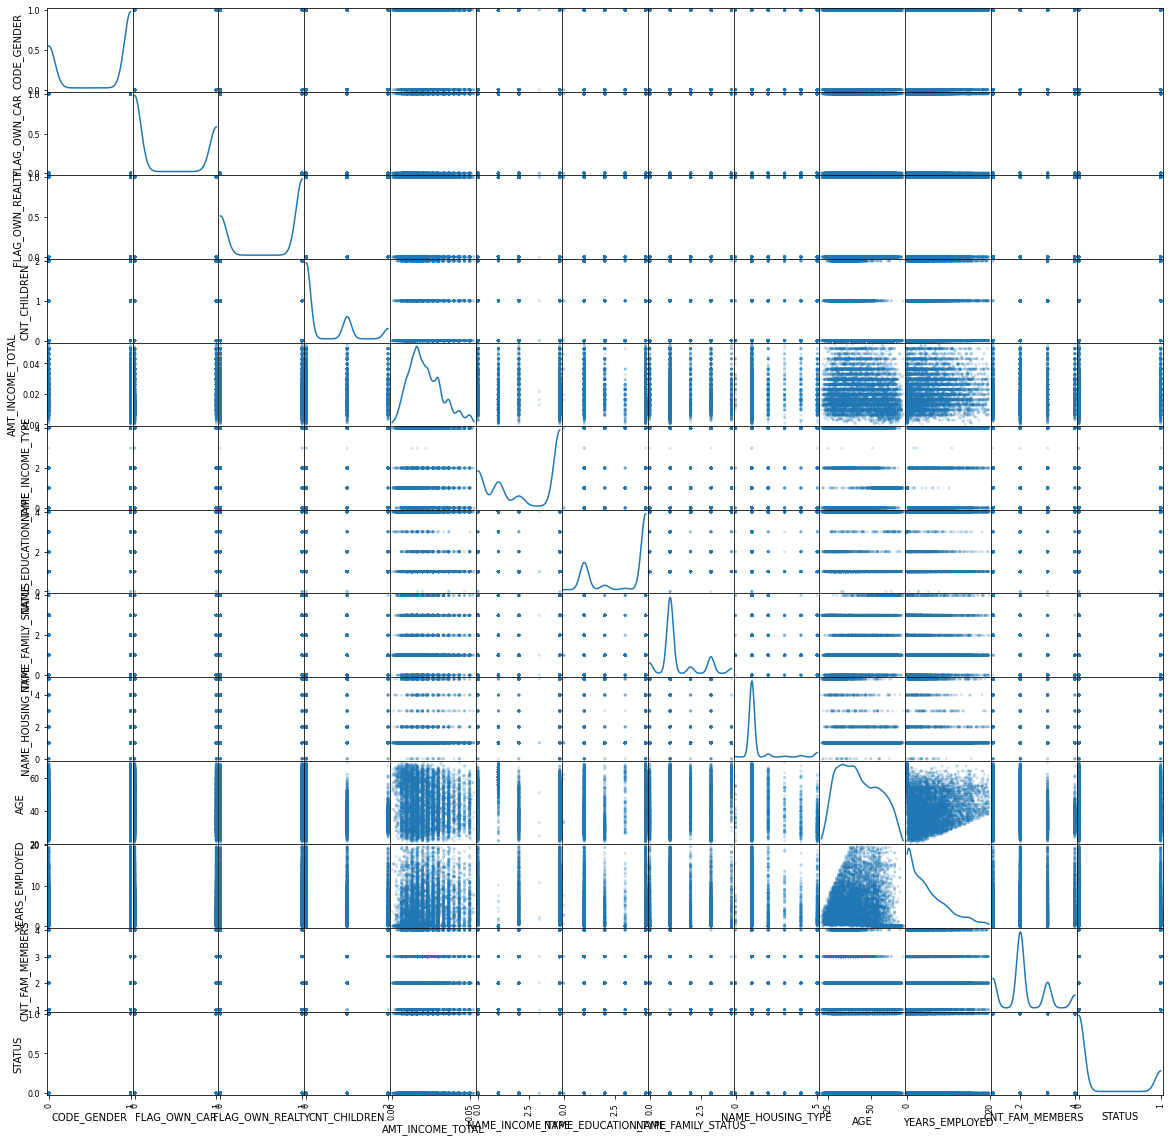

In [71]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

<AxesSubplot:>

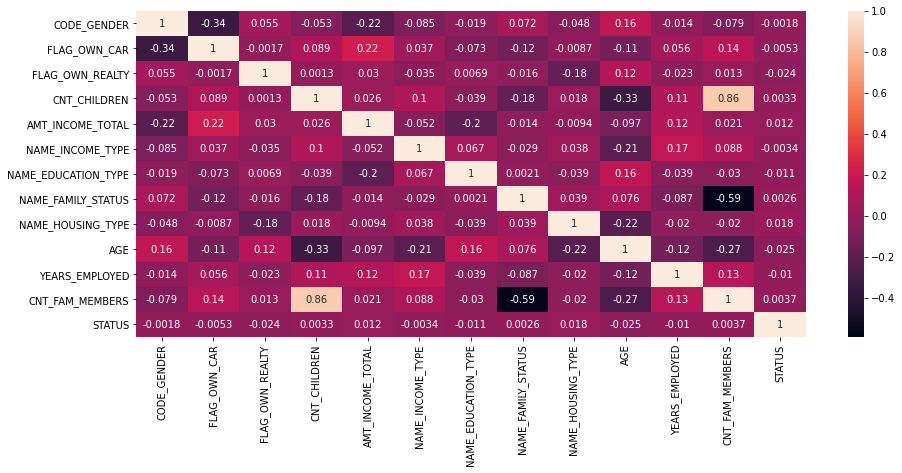

In [72]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot=True)

In [73]:
from sklearn.model_selection import train_test_split

X = df.drop(['STATUS'], axis=1)
y = df['STATUS']

In [74]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,0,1,1,0,0.012850,4,4,1,1,59.0,3.1,2.0
1,1,0,1,0,0.036274,0,4,3,1,52.0,8.4,1.0
2,1,0,1,0,0.038281,1,1,2,1,62.0,-0.0,1.0
3,0,1,1,0,0.036274,4,1,1,1,46.0,2.1,2.0
4,0,1,1,0,0.016196,0,4,1,1,49.0,3.3,2.0


In [75]:
y.value_counts()

0    7877
1    2127
Name: STATUS, dtype: int64

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [77]:
x_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
5910,1,0,1,0,0.016196,4,4,1,1,53.0,0.3,2.0
7169,0,0,0,0,0.012850,4,4,2,1,31.0,12.2,1.0
73,1,0,0,0,0.036274,4,1,1,1,34.0,2.4,2.0
4038,0,0,1,2,0.036274,4,4,1,1,30.0,5.1,4.0
9184,1,0,1,2,0.007496,2,1,1,1,40.0,5.9,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,1,0,0.012850,2,1,1,1,38.0,10.3,2.0
5191,0,0,1,0,0.036274,4,4,2,1,37.0,2.7,1.0
5390,1,1,0,0,0.029581,4,4,3,1,37.0,10.8,1.0
860,0,1,1,2,0.016196,4,4,1,1,34.0,11.8,4.0


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [80]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [81]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test, y_test)

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


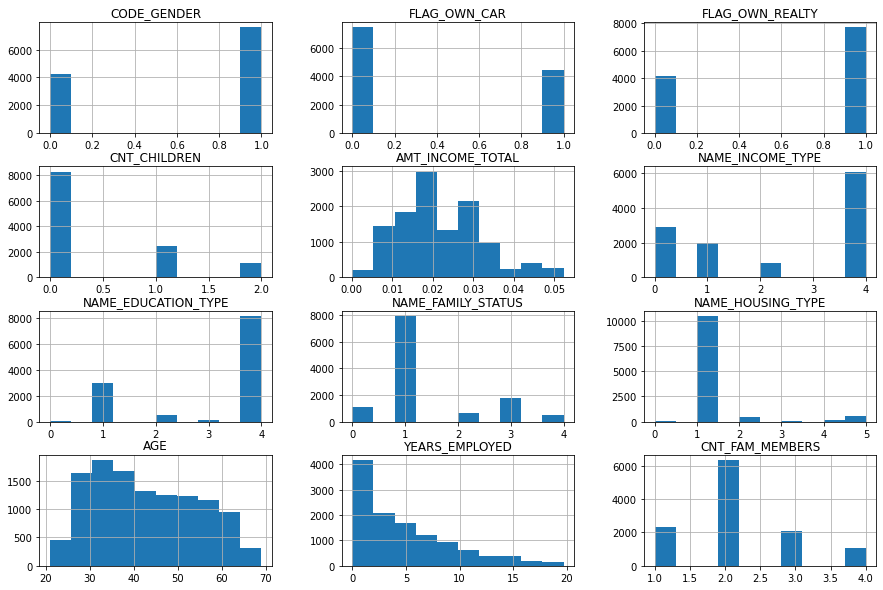

In [82]:
x_train_oversam.hist(figsize = (15,10))
plt.show()

In [83]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 5910 to 7270
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          7503 non-null   int64  
 1   FLAG_OWN_CAR         7503 non-null   int64  
 2   FLAG_OWN_REALTY      7503 non-null   int64  
 3   CNT_CHILDREN         7503 non-null   int64  
 4   AMT_INCOME_TOTAL     7503 non-null   float64
 5   NAME_INCOME_TYPE     7503 non-null   int64  
 6   NAME_EDUCATION_TYPE  7503 non-null   int64  
 7   NAME_FAMILY_STATUS   7503 non-null   int64  
 8   NAME_HOUSING_TYPE    7503 non-null   int64  
 9   AGE                  7503 non-null   float64
 10  YEARS_EMPLOYED       7503 non-null   float64
 11  CNT_FAM_MEMBERS      7503 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 762.0 KB


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score


log = LogisticRegression()
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [85]:
print("Accuracy:",log.score(x_test, y_test)*100)

Accuracy: 78.48860455817673


In [86]:
y_pred = log.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[1963    0]
 [ 538    0]]


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1963
           1       0.00      0.00      0.00       538

    accuracy                           0.78      2501
   macro avg       0.39      0.50      0.44      2501
weighted avg       0.62      0.78      0.69      2501



/home/ppottapatri1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ppottapatri1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ppottapatri1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dm = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

dm.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=8)

In [89]:
print("Accuracy:",dm.score(x_test_scaled, y_test)*100)
y_pred = dm.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 70.81167532986805

Confusion matrix :
[[1752  211]
 [ 519   19]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1963
           1       0.08      0.04      0.05       538

    accuracy                           0.71      2501
   macro avg       0.43      0.46      0.44      2501
weighted avg       0.62      0.71      0.66      2501



## [5] Decision Tree using non-numerical and numerical

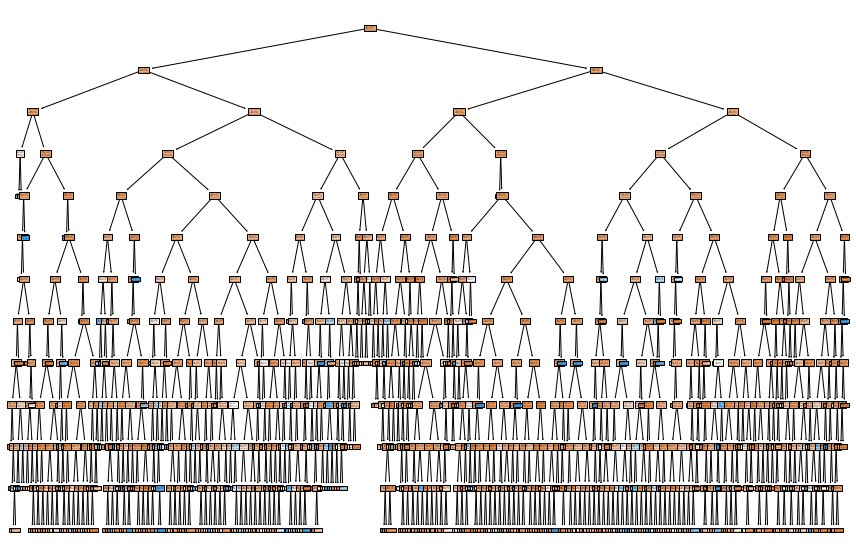

In [90]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dm,
                   filled=True)
plt.show()

## Doing work on only numerical features

In [91]:
only_num.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,0,1,1,0,0.012850,59.0,3.1,2.0,0
1,1,0,1,0,0.036274,52.0,8.4,1.0,0
2,1,0,1,0,0.038281,62.0,-0.0,1.0,0
3,0,1,1,0,0.036274,46.0,2.1,2.0,0
4,0,1,1,0,0.016196,49.0,3.3,2.0,0


In [92]:
X = only_num.drop('STATUS', axis=1)
y = only_num['STATUS']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 42)
ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [93]:
x_train_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,0.751068,-0.772038,0.721363,-0.601830,-0.498033,0.854542,-0.974312,-0.180437
1,-1.331438,-0.772038,-1.386264,-0.601830,-0.817164,-1.027406,1.583618,-1.366956
2,0.751068,-0.772038,-1.386264,-0.601830,1.416754,-0.770777,-0.522913,-0.180437
3,-1.331438,-0.772038,0.721363,2.455402,1.416754,-1.112950,0.057458,2.192602
4,0.751068,-0.772038,0.721363,2.455402,-1.327774,-0.257519,0.229420,2.192602
...,...,...,...,...,...,...,...,...
7498,0.751068,-0.772038,0.721363,-0.601830,-0.817164,-0.428605,1.175209,-0.180437
7499,-1.331438,-0.772038,0.721363,-0.601830,1.416754,-0.514148,-0.458427,-1.366956
7500,0.751068,1.295272,-1.386264,-0.601830,0.778491,-0.514148,1.282685,-1.366956
7501,-1.331438,1.295272,0.721363,2.455402,-0.498033,-0.770777,1.497637,2.192602


In [94]:
dm = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

dm.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=8)

In [95]:
print("Accuracy:",dm.score(x_test_scaled, y_test)*100)
y_pred = dm.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 72.41103558576569

Confusion matrix :
[[1802  161]
 [ 529    9]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1963
           1       0.05      0.02      0.03       538

    accuracy                           0.72      2501
   macro avg       0.41      0.47      0.43      2501
weighted avg       0.62      0.72      0.66      2501



## [6] Decision Tree using only numerical data

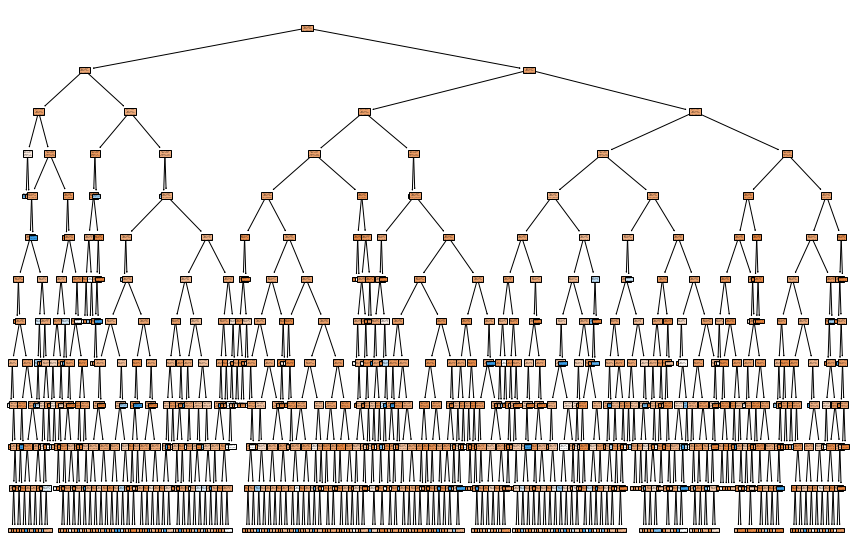

In [96]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dm,
                   filled=True)
plt.show()

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score


log = LogisticRegression()
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [98]:
print("Accuracy:",log.score(x_test_scaled, y_test)*100)
y_pred = log.predict(x_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 78.48860455817673
[[1963    0]
 [ 538    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1963
           1       0.00      0.00      0.00       538

    accuracy                           0.78      2501
   macro avg       0.39      0.50      0.44      2501
weighted avg       0.62      0.78      0.69      2501



/home/ppottapatri1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ppottapatri1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ppottapatri1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
